# Purpose


This notebook demonstrates the data pipeline from raw tables to analytical datasets. At the end of this activity, train & test data sets are created from raw data.



## Imports

In [1]:
from pprint import pprint
import os
import os.path as op
import shutil

# standard third party imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.mode.use_inf_as_na = True


In [2]:
%load_ext autoreload
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
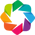

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
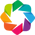

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
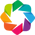

In [3]:
# standard code-template imports
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, get_package_path,
    display_as_tabs, string_cleaning, merge_info, initialize_environment,
    list_datasets, load_dataset, save_dataset
)
import ta_lib.eda.api as eda

In [4]:
initialize_environment(debug=False, hide_warnings=True)

## Utility functions

# 1. Initialization

In [5]:
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)
pprint(list_datasets(context))

google_df = load_dataset(context, 'raw/google')
product_df = load_dataset(context, 'raw/product')
sales_df = load_dataset(context, 'raw/sales')
media_df = load_dataset(context, 'raw/media')
theme_list_df = load_dataset(context, 'raw/theme_list')
tpl_df = load_dataset(context, 'raw/tpl')

['/raw/google',
 '/raw/product',
 '/raw/sales',
 '/raw/media',
 '/raw/theme_list',
 '/raw/tpl',
 '/cleaned/google',
 '/cleaned/product',
 '/cleaned/sales',
 '/cleaned/media',
 '/cleaned/theme_list',
 '/cleaned/tpl',
 '/processed/sales',
 '/train/sales/features',
 '/train/sales/target',
 '/test/sales/features',
 '/test/sales/target',
 '/score/sales/output']


# 2. Data cleaning and consolidation

**<u>NOTES</u>**

The focus here is to create a cleaned dataset that is appropriate for solving the DS problem at hand from the raw data.

**1. Do**
* clean dataframe column names
* ensure dtypes are set properly
* join with other tables etc to create features
* transform, if appropriate, datetime like columns to generate additional features (weekday etc)
* transform, if appropriate, string columns to generate additional features
* discard cols that are not useful for training the model (IDs, constant cols, duplicate cols etc)
* additional features generated from existing columns


**2. Don't**
* handle missing values or outliers here. mark them and leave them for processing downstream.


## 2.1 Clean individual tables 

### Google Table

From data discovery, we know the following

* One column is strings : nothing to fix. Apply generic cleaning (strip extra whitespace etc)
* This will go into production code


In [6]:
str_cols = list(
    set(google_df.select_dtypes('object').columns.to_list())
    - set(['date'])
)

google_df_clean = (
    google_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .to_datetime('date', format='%d-%m-%Y')

    .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
google_df_clean['week'] = pd.to_datetime(google_df_clean['date']).dt.week
google_df_clean['month'] = pd.to_datetime(google_df_clean['date']).dt.month
google_df_clean['quarter'] = pd.to_datetime(google_df_clean['date']).dt.quarter
google_df_clean['year'] = pd.to_datetime(google_df_clean['date']).dt.year
google_df_clean = google_df_clean.drop(columns=['date','week_number','year_new'])
google_df_clean.head()

platform  search_volume  claim_id  week  month  quarter  year
0   google            349       916     1      1        1  2014
1   google            349       916     2      1        1  2014
2   google            697       916     2      1        1  2014
3   google            349       916     2      1        1  2014
4   google            697       916     4      1        1  2014

### Products Table

From data discovery, we know the following

* One column is strings : nothing to fix. Apply generic cleaning (strip extra whitespace etc)
* PRODUCT_ID is key column : ensure no duplicate values
* This will go into production code


In [7]:
str_cols = list(
    set(product_df.select_dtypes('object').columns.to_list())
)

product_df_clean = (
    product_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
product_df_clean.head()

product_id  vendor
0           1  Others
1           2  Others
2           3  Others
3           4  Others
4           5  Others

### Sales Table

From data discovery, we know the following

* No column is strings : nothing to fix.
* Change system_calendar_key_N column to datetime
* This will go into production code


In [8]:
sales_df['system_calendar_key_N'] = sales_df['system_calendar_key_N'].apply(str)
sales_df_clean = (
    sales_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .to_datetime('system_calendar_key_N', format='%Y%m%d')

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
sales_df_clean['week'] = pd.to_datetime(sales_df_clean['system_calendar_key_n']).dt.week
sales_df_clean['month'] = pd.to_datetime(sales_df_clean['system_calendar_key_n']).dt.month
sales_df_clean['quarter'] = pd.to_datetime(sales_df_clean['system_calendar_key_n']).dt.quarter
sales_df_clean['year'] = pd.to_datetime(sales_df_clean['system_calendar_key_n']).dt.year
sales_df_clean = sales_df_clean.drop(columns = ['system_calendar_key_n'])
sales_df_clean.head()

product_id  sales_dollars_value  sales_units_value  sales_lbs_value  week  \
0           1              13927.0                934            18680     1   
1           3              10289.0               1592            28646     1   
2           4                357.0                 22              440     1   
3           6              23113.0               2027            81088     1   
4           7              23177.0               3231            58164     1   

   month  quarter  year  
0      1        1  2016  
1      1        1  2016  
2      1        1  2016  
3      1        1  2016  
4      1        1  2016

### Media Table

From data discovery, we know the following

* Change published_date column to datetime
* This will go into production code


In [9]:
media_df['published_date'] = media_df['published_date'].apply(lambda x: x.replace('/','-'))
media_df_clean = (
    media_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    .to_datetime('published_date', format='%m-%d-%Y')

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
media_df_clean['week'] = pd.to_datetime(media_df_clean['published_date']).dt.week
media_df_clean['month'] = pd.to_datetime(media_df_clean['published_date']).dt.month
media_df_clean['quarter'] = pd.to_datetime(media_df_clean['published_date']).dt.quarter
media_df_clean['year'] = pd.to_datetime(media_df_clean['published_date']).dt.year
media_df_clean = media_df_clean.drop(columns = ['published_date'])
media_df_clean.rename(columns={'i»¿_theme_id': 'claim_id', 'theme_id': 'claim_id'},inplace=True)
media_df_clean.head()

claim_id  total_post  week  month  quarter  year
0     148.0          76    40     10        4  2015
1     148.0          31    41     10        4  2015
2     148.0          65    41     10        4  2015
3     148.0          88    42     10        4  2015
4     148.0          85    42     10        4  2015

### Theme List Table

From data discovery, we know the following

* One column is string : nothing to fix. Apply generic cleaning (strip extra whitespace etc)
* This will go into production code


In [10]:
str_cols = list(
    set(theme_list_df.select_dtypes('object').columns.to_list())
)
theme_list_df_clean = (
    theme_list_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
theme_list_df_clean.head()

claim_id claim_name
0         0   No Claim
1         8   low carb
2        15      beans
3        16      cocoa
4        26    vanilla

### Theme Production List Table

From data discovery, we know the following

* No column is string : nothing to fix. 
* This will go into production code


In [11]:
tpl_df_clean = (
    tpl_df
    # while iterating on testing, it's good to copy the dataset(or a subset)
    # as the following steps will mutate the input dataframe. The copy should be
    # removed in the production code to avoid introducing perf. bottlenecks.
    .copy()

    # set dtypes : nothing to do here
    .passthrough()

    # .transform_columns(str_cols, string_cleaning, elementwise=False)
    
    # .replace({'': np.NaN})
    
    # drop unnecessary cols : nothing to do here
    
    # ensure that the key column does not have duplicate records
    # .remove_duplicate_rows(col_names=['PRODUCT_ID'], keep_first=True)
    
    # clean column names (comment out this line while cleaning data above)
    .clean_names(case_type='snake')
)
tpl_df_clean.head()

product_id  claim_id
0          26         8
1          29         8
2          48        81
3          50        81
4          74       227

### NOTE

It's always a good idea to save cleaned tabular data using a storage format that supports the following 

1. preserves the type information
2. language agnostic storage format
3. Supports compression
4. Supports customizing storage to optimize different data access patterns

For larger datasets, the last two points become crucial.

`Parquet` is one such file format that is very popular for storing tabular data. It has some nice properties:
- Similar to pickles & RDS datasets, but compatible with all languages
- Preserves the datatypes
- Compresses the data and reduces the filesize
- Good library support in Python and other languages
- As a columnar storage we can efficiently read fewer columns
- It also supports chunking data by groups of columns (for instance, by dates or a particular value of a key column) that makes loading subsets of the data fast.

In [12]:
save_dataset(context, google_df_clean, 'cleaned/google')
save_dataset(context, product_df_clean, 'cleaned/product')
save_dataset(context, sales_df_clean, 'cleaned/sales')
save_dataset(context, media_df_clean, 'cleaned/media')
save_dataset(context, theme_list_df_clean, 'cleaned/theme_list')
save_dataset(context, tpl_df_clean, 'cleaned/tpl')

## 2.2 Create consolidated features table

Here we take the cleaned dataframes and merge them to form the consolidated table.

We know from data discovery that `products` is a dimension table and `orders` is a fact table, so we want to do a left join here. * This will go into production code

### List of themes available across all data sources

In [13]:
lists = theme_list_df_clean.claim_name.unique().tolist()
print(len(lists))
print(lists)

208
['No Claim', 'low carb', 'beans', 'cocoa', 'vanilla', 'stroganoff', 'cumin', 'high/source of protein', 'no additives/preservatives', 'buckwheat', 'tutti frutti', 'ethical - not specific', 'brown ale', 'french bisque', 'pheasant', 'whitebait', 'gmo free', 'low calorie', 'peach', 'crab', 'nuts', 'venison', 'fruit', 'convenience - easy-to-prepare', 'anchovy', 'pomegranate', 'scallop', 'american gumbo', 'tuna', 'low sodium', 'low sugar', 'french', 'chicken', 'ethical - packaging', 'cherry', 'vitamin/mineral fortified', 'liver', 'red raspberry', 'cookie', 'pollock', 'blueberry', 'bone health', 'prebiotic', 'poultry', 'cheddar cheese', 'energy/alertness', 'halal', 'herbs', 'pizza', 'american southwest style', 'salmon', 'beef hamburger', 'tilapia', 'mackerel', 'peanut', 'lobster', 'sea salt', 'soy foods', 'apple cinnamon', 'gingerbread', 'vegetarian', 'ethnic & exotic', 'cream', 'berry', 'gluten free', 'added calcium', 'added fiber', 'added iron', 'added protein', 'allergy', 'anti-aging/a

### Understand the overall market share of A

In [14]:
fs_df = pd.merge(sales_df_clean, product_df_clean, on='product_id', how= 'inner')
merge_info(sales_df_clean,product_df_clean, fs_df)

n_cols   n_rows
left_df         8  4526182
right_df        2    67175
merged_df       9  4526182

In [15]:
fs_df.duplicated().sum()

0

In [16]:
market_share = fs_df.groupby('vendor')['sales_dollars_value'].sum().to_frame()
market_share = market_share*100/market_share.sum()
market_share.reset_index(inplace=True)
market_share.rename(columns = {'sales_dollars_value':'market_share_in_%'}, inplace = True)
market_share

vendor  market_share_in_%
0              A          31.647006
1              B          15.736254
2              D          12.243428
3              E           1.984087
4              F           5.111352
5              G           1.996254
6              H           2.330302
7         Others          18.972815
8  Private Label           9.978502

### The potential competitors for A in each theme

In [17]:
theme_df = pd.merge(theme_list_df_clean, tpl_df_clean, on='claim_id', how= 'inner')
merge_info(theme_list_df_clean,tpl_df_clean, theme_df)

n_cols  n_rows
left_df         2     208
right_df        2   91485
merged_df       3   91485

In [18]:
theme_df.claim_id.nunique()

51

In [19]:
final_sales_df = pd.merge(fs_df, theme_df, on='product_id', how= 'inner')
merge_info(fs_df,theme_df, final_sales_df)

n_cols   n_rows
left_df         9  4526182
right_df        3    91485
merged_df      11  7767420

In [20]:
set(theme_df.claim_id.unique()) - set(final_sales_df.claim_id.unique())

{59, 157}

In [21]:
theme_df[(theme_df.claim_id == 59) | (theme_df.claim_id == 157)]

claim_id    claim_name  product_id
62139        59  tutti frutti        5800
62140        59  tutti frutti        5822
62141        59  tutti frutti        5801
62142        59  tutti frutti        5816
62143        59  tutti frutti        5795
62144        59  tutti frutti        5797
62145        59  tutti frutti        5818
62146        59  tutti frutti        5760
62147        59  tutti frutti        5761
62148        59  tutti frutti        5763
62149        59  tutti frutti        5796
62150        59  tutti frutti        5804
68017       157        french        8419

In [22]:
potential_competitor = final_sales_df.groupby(['claim_name', 'vendor'])['sales_dollars_value'].sum().reset_index()
potential_competitor.sort_values(by= ['claim_name','sales_dollars_value'], ascending=[True,False],inplace=True)

In [23]:
potential_competitor = potential_competitor.groupby(['claim_name']).head(5)

In [24]:
sum1 = eda.get_variable_summary(potential_competitor)
display_as_tabs([('competitor', sum1)])

Tabs
    [0] DataFrame(name='competitor', value=                          ...)

In [25]:
potential_competitor.vendor.value_counts()

Others           46
A                32
B                22
Private Label    20
F                17
D                16
H                 9
Name: vendor, dtype: int64

In [26]:
import matplotlib.pyplot as plt

In [27]:
potential_competitor[potential_competitor.claim_name == 'beans']

claim_name         vendor  sales_dollars_value
31      beans         Others          302386662.0
30      beans              D            2721468.0
29      beans              A             965413.0
32      beans  Private Label             294874.0

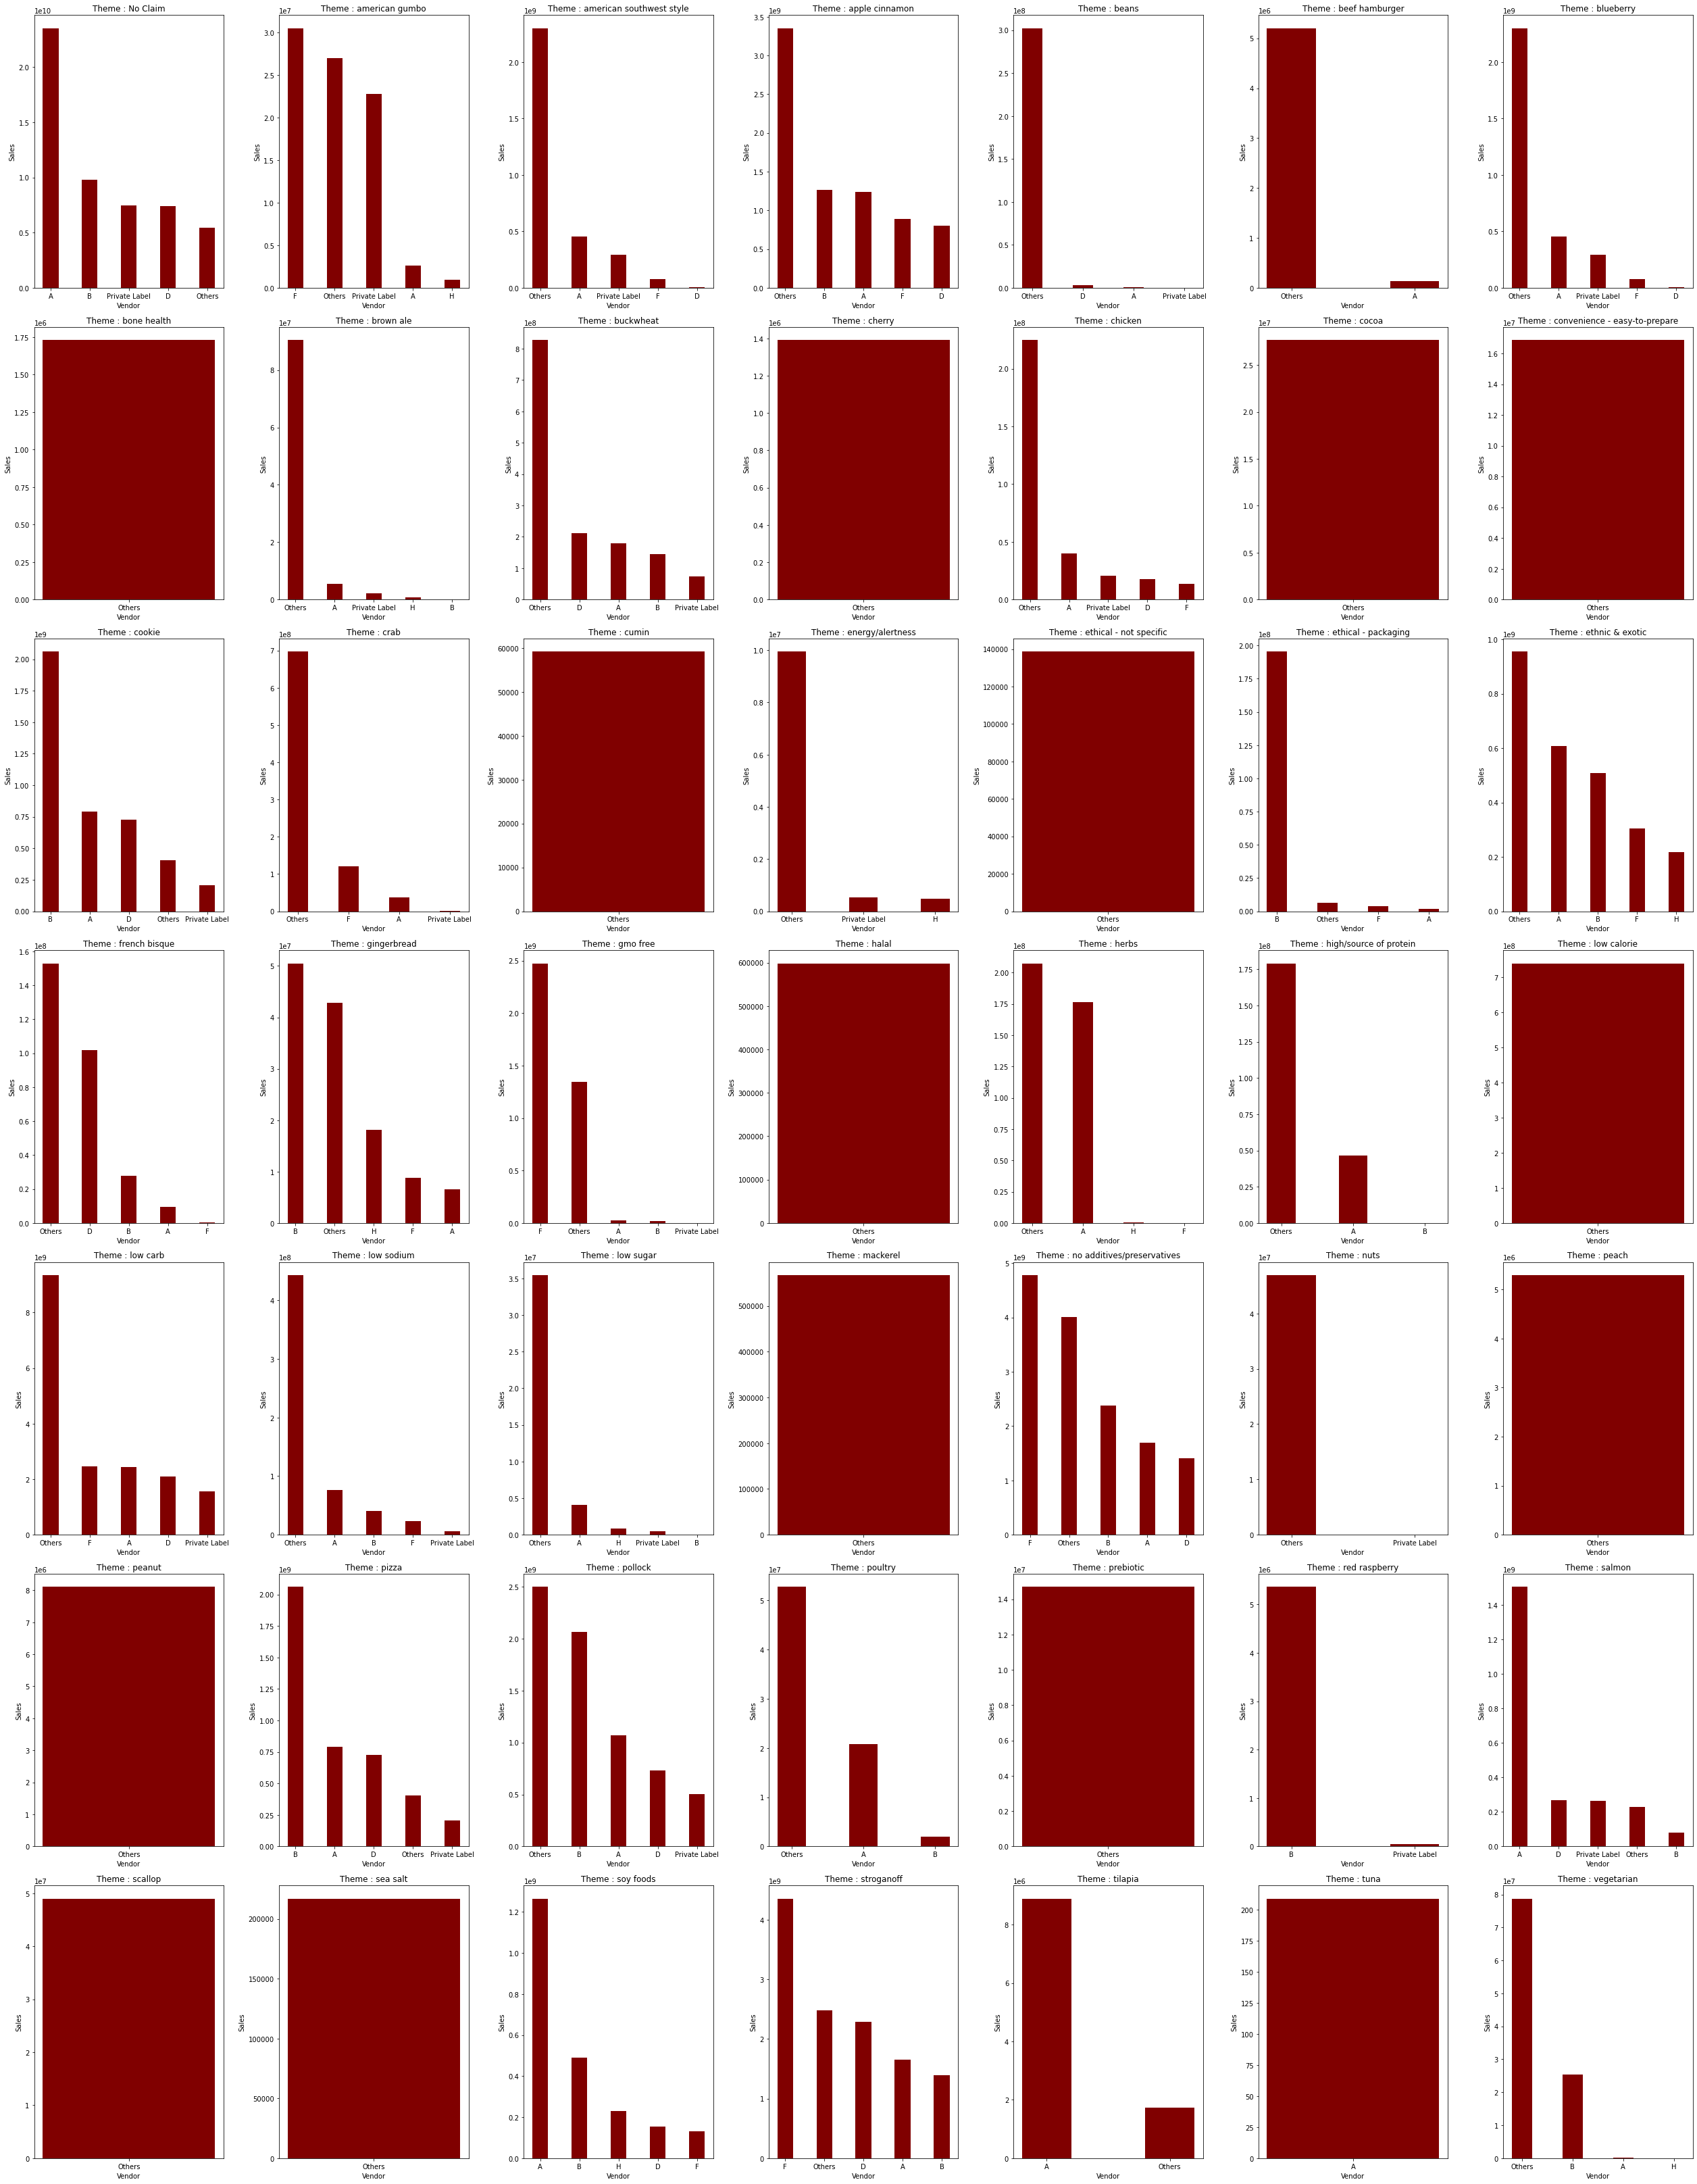

In [28]:
themes = potential_competitor.claim_name.unique().tolist()
fig, axs = plt.subplots(7, 7,figsize=(35,45))
for j,i in enumerate(themes):
    # potential_competitor[potential_competitor.claim_name == i].unstack().plot(kind='bar', figsize = (15,10))
    d = potential_competitor[potential_competitor.claim_name == i]
 
    # creating the bar plot
    m = j//7
    n = j%7
    axs[m,n].bar(d.vendor, d.sales_dollars_value, color ='maroon',
            width = 0.4)
    
#     axs[m,n].xlabel("Vendor")
#     axs[m,n].ylabel("Sales")
    axs[m,n].set_title("Theme : {}".format(i))
#     axs[m,n].show()

for ax in axs.flat:
    ax.set(xlabel='Vendor', ylabel='Sales')

### Understands consumer preference(themes)

In [29]:
counsumer_preference = final_sales_df.groupby('claim_name')['sales_dollars_value'].count().to_frame()
counsumer_preference.sort_values(by= ['sales_dollars_value'], ascending=[False],inplace=True)
counsumer_preference.reset_index()

claim_name  sales_dollars_value
0                        No Claim              2045703
1                        low carb              1668808
2      no additives/preservatives               826406
3                  apple cinnamon               520679
4                      stroganoff               387999
5                         pollock               338116
6                       blueberry               218897
7        american southwest style               218897
8                        gmo free               215635
9                       buckwheat               175912
10                         cookie               146173
11                          pizza               146173
12                ethnic & exotic               132719
13                           crab               129212
14                         salmon                84542
15                        chicken                73382
16                     low sodium                60132
17                      soy foods                55961
18                  french bisque                42655
19                          beans                35758
20                          herbs                26954
21                          cocoa                26367
22                      brown ale                25085
23         high/source of protein                24818
24                    gingerbread                22113
25                    low calorie                17795
26                           nuts                16617
27                     vegetarian                12152
28                 american gumbo                11514
29            ethical - packaging                10967
30                        poultry                 8539
31  convenience - easy-to-prepare                 8208
32                        scallop                 7016
33                      low sugar                 6117
34               energy/alertness                 5038
35                 beef hamburger                 4485
36                        tilapia                 4216
37                      prebiotic                 1001
38                          peach                  956
39                         cherry                  827
40                         peanut                  824
41                       mackerel                  726
42                    bone health                  598
43                  red raspberry                  264
44                          cumin                  150
45                          halal                  138
46                       sea salt                  112
47         ethical - not specific                   61
48                           tuna                    3

In [30]:
counsumer_preference = final_sales_df.groupby('claim_name')['sales_dollars_value'].sum().to_frame()
counsumer_preference.sort_values(by= ['sales_dollars_value'], ascending=[False],inplace=True)
counsumer_preference.reset_index()

claim_name  sales_dollars_value
0                        No Claim         5.876714e+10
1                        low carb         1.862566e+10
2      no additives/preservatives         1.438821e+10
3                      stroganoff         1.275780e+10
4                  apple cinnamon         8.094533e+09
5                         pollock         7.007307e+09
6                          cookie         4.254113e+09
7                           pizza         4.254113e+09
8                        gmo free         3.859459e+09
9        american southwest style         3.137485e+09
10                      blueberry         3.137485e+09
11                ethnic & exotic         2.806207e+09
12                         salmon         2.400092e+09
13                      soy foods         2.377886e+09
14                      buckwheat         1.465495e+09
15                           crab         8.559114e+08
16                    low calorie         7.389844e+08
17                     low sodium         5.903028e+08
18                          herbs         3.842909e+08
19                        chicken         3.218462e+08
20                          beans         3.063684e+08
21                  french bisque         2.924757e+08
22         high/source of protein         2.256020e+08
23            ethical - packaging         2.075618e+08
24                    gingerbread         1.275830e+08
25                     vegetarian         1.043022e+08
26                      brown ale         9.882768e+07
27                 american gumbo         8.454704e+07
28                        poultry         7.552952e+07
29                        scallop         4.900701e+07
30                           nuts         4.700546e+07
31                      low sugar         4.088466e+07
32                          cocoa         2.768481e+07
33  convenience - easy-to-prepare         1.688691e+07
34                      prebiotic         1.470185e+07
35               energy/alertness         1.094877e+07
36                        tilapia         1.062656e+07
37                         peanut         8.108027e+06
38                  red raspberry         5.417871e+06
39                 beef hamburger         5.338946e+06
40                          peach         5.294008e+06
41                    bone health         1.731056e+06
42                         cherry         1.392018e+06
43                          halal         5.985130e+05
44                       mackerel         5.673880e+05
45                       sea salt         2.170480e+05
46         ethical - not specific         1.386720e+05
47                          cumin         5.918100e+04
48                           tuna         2.090000e+02

### Validate the hypothesis: Trend flows from Social -> Search -> Sales

In [31]:
google_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181565 entries, 0 to 181564
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   platform       181565 non-null  object
 1   search_volume  181565 non-null  int64 
 2   claim_id       181565 non-null  int64 
 3   week           181565 non-null  int64 
 4   month          181565 non-null  int64 
 5   quarter        181565 non-null  int64 
 6   year           181565 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 9.7+ MB


In [32]:
media_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533390 entries, 0 to 533389
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   claim_id    314879 non-null  float64
 1   total_post  533390 non-null  int64  
 2   week        533390 non-null  int64  
 3   month       533390 non-null  int64  
 4   quarter     533390 non-null  int64  
 5   year        533390 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 24.4 MB


In [33]:
gf_df = google_df_clean.groupby(
        ['year', 'quarter', 'month', 'week', 'claim_id','platform']
        )['search_volume'].sum().to_frame().reset_index()

mf_df = media_df_clean.groupby(
        ['year', 'quarter', 'month', 'week', 'claim_id']
        )['total_post'].sum().to_frame().reset_index()

In [34]:
# hyp_df = pd.merge(google_df_clean,media_df_clean, left_on=['date','claim_id'], right_on=['theme_id','published_date'],how='inner')
# hyp_df = google_df_clean.merge(media_df_clean, on=['year', 'quarter', 'month', 'week', 'claim_id'], how='inner')
# merge_info(google_df_clean,media_df_clean,hyp_df)
social_df = gf_df.merge(mf_df, on=['year', 'quarter', 'month', 'week', 'claim_id'], how='inner')
merge_info(gf_df,mf_df,social_df)

n_cols  n_rows
left_df         7   44713
right_df        6   53421
merged_df       8   37622

In [35]:
social_df.head()

year  quarter  month  week  claim_id platform  search_volume  total_post
0  2015        2      5    21         8   google          47307         412
1  2015        2      5    21        39   google           1446          10
2  2015        2      5    21        75   google           8356          74
3  2015        2      5    21        81   google           7181         104
4  2015        2      5    21       100   google          10543           3

In [36]:
final_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767420 entries, 0 to 7767419
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   product_id           int64  
 1   sales_dollars_value  float64
 2   sales_units_value    int64  
 3   sales_lbs_value      int64  
 4   week                 int64  
 5   month                int64  
 6   quarter              int64  
 7   year                 int64  
 8   vendor               object 
 9   claim_id             int64  
 10  claim_name           object 
dtypes: float64(1), int64(8), object(2)
memory usage: 711.1+ MB


In [37]:
# final_sales_df = final_sales_df.rename(columns={'system_calendar_key_n':'date'})

In [38]:
final_df = final_sales_df.merge(social_df,on=['year', 'quarter', 'month', 'week','claim_id'],how='inner')
merge_info(final_sales_df,social_df,final_df)

n_cols   n_rows
left_df        11  7767420
right_df        8    37622
merged_df      14  6208890

In [39]:
# final_df['month'] = pd.to_datetime(final_df['date']).dt.month
# final_df.head()

In [40]:
# final_df.week_number.nunique()

In [41]:
# final_df['bi_week'] = final_df['week_number']//2

In [42]:
latency_theme = final_df[final_df['claim_id'] == 158]

In [43]:
df = latency_theme.groupby(['year','month'])[['sales_dollars_value','search_volume','total_post']].sum()
df.head()

sales_dollars_value  search_volume  total_post
year month                                                
2016 1                5372932.0      128120898      513946
     2                5746712.0       99008545      922232
     3                5822442.0      116064867      273453
     4                7051465.0      132907992      294419
     5                4998199.0       96784820      282972

In [44]:
df.columns

Index(['sales_dollars_value', 'search_volume', 'total_post'], dtype='object')

In [45]:
for i in df.columns:
    column = i
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
df.head()

sales_dollars_value  search_volume  total_post
year month                                                
2016 1                 0.090054       0.320827    0.058883
     2                 0.103710       0.243734    0.105661
     3                 0.106476       0.288901    0.031330
     4                 0.151376       0.333504    0.033732
     5                 0.076364       0.237845    0.032420

FixedFormatter should only be used together with FixedLocator


<AxesSubplot:xlabel='year,month'>

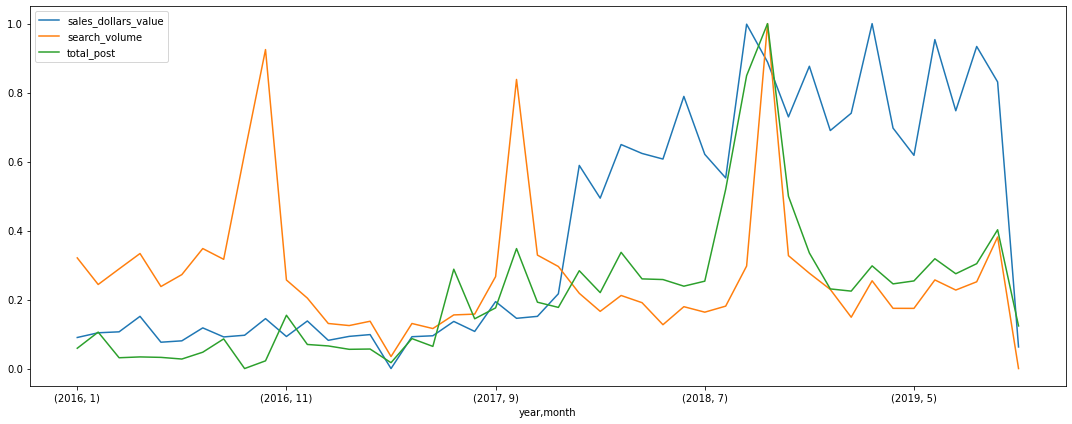

In [46]:
df.plot.line(figsize=(15,6))

In [47]:
final_df.claim_id.nunique()

30

FixedFormatter should only be used together with FixedLocator


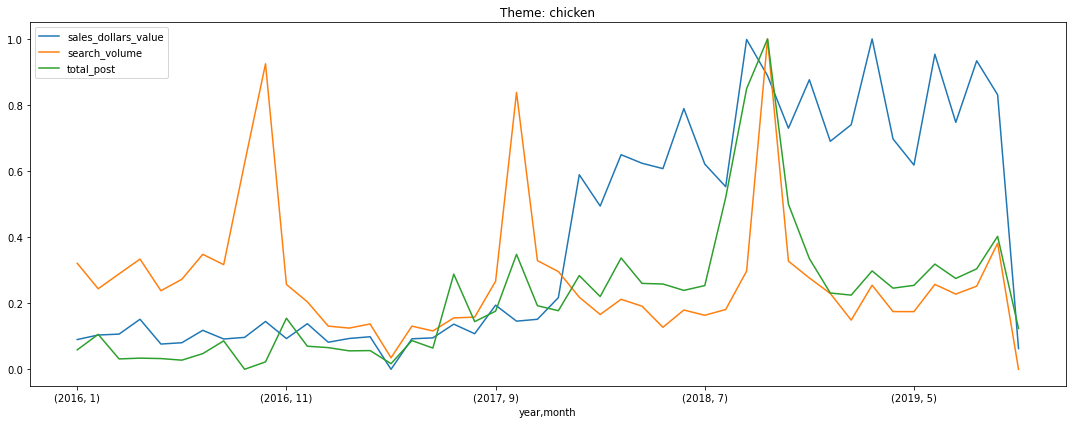

FixedFormatter should only be used together with FixedLocator


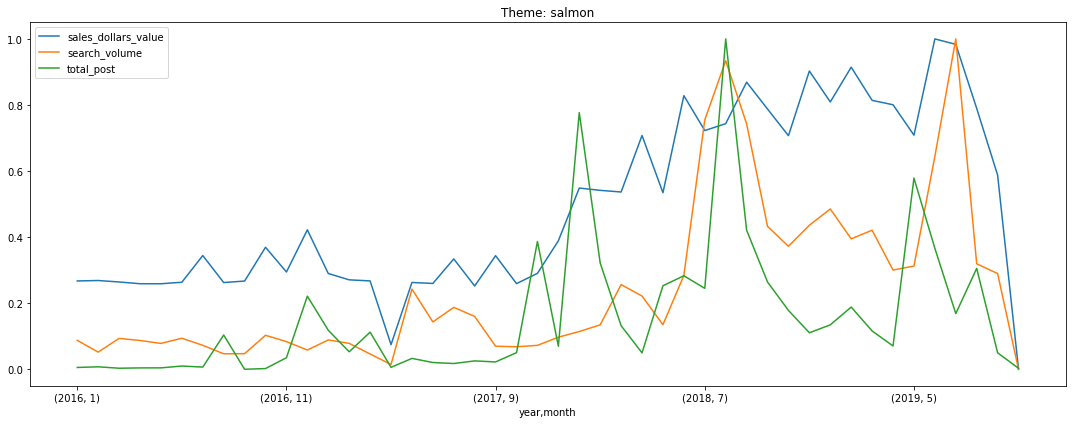

FixedFormatter should only be used together with FixedLocator


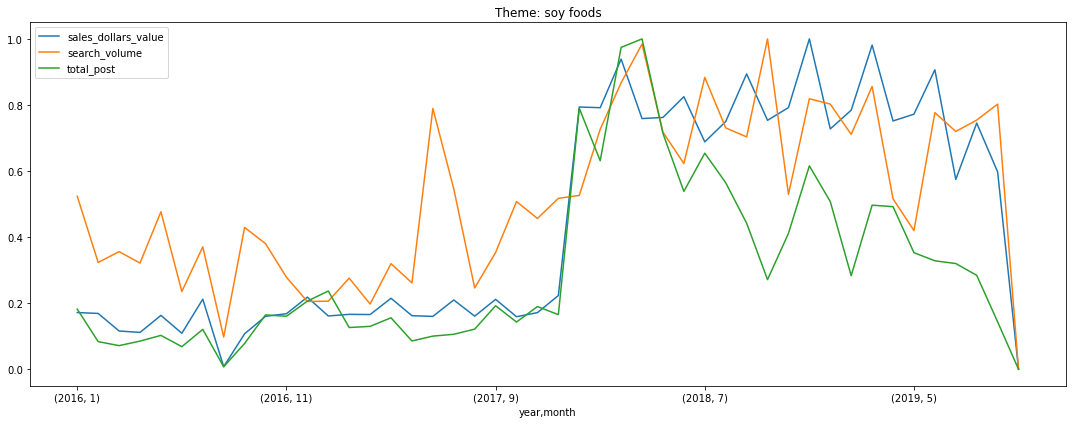

FixedFormatter should only be used together with FixedLocator


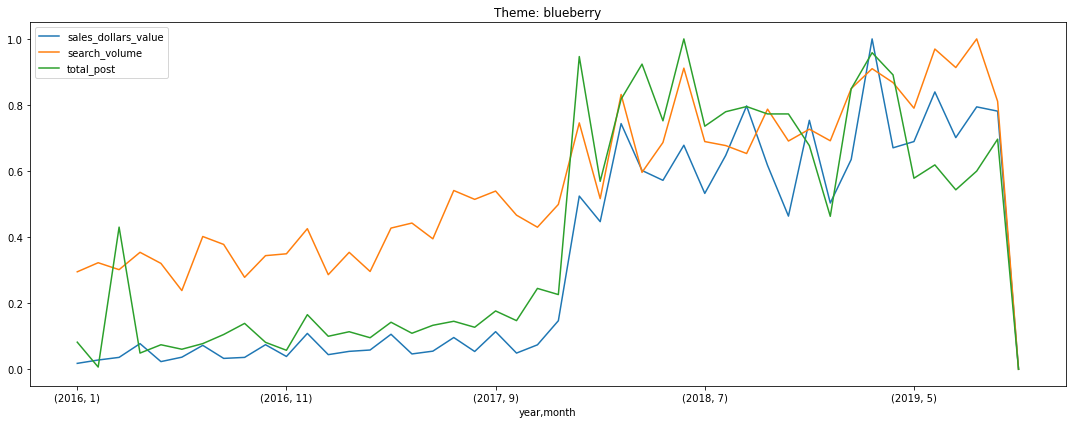

FixedFormatter should only be used together with FixedLocator


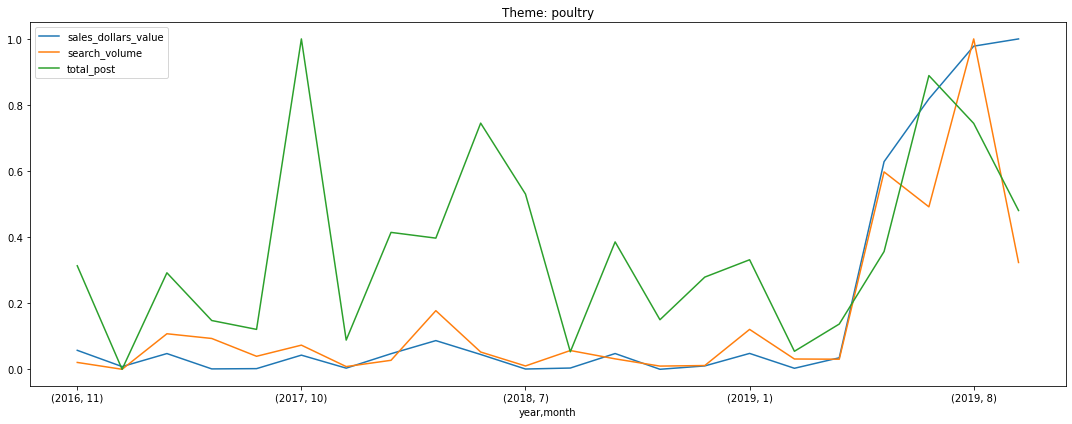

FixedFormatter should only be used together with FixedLocator


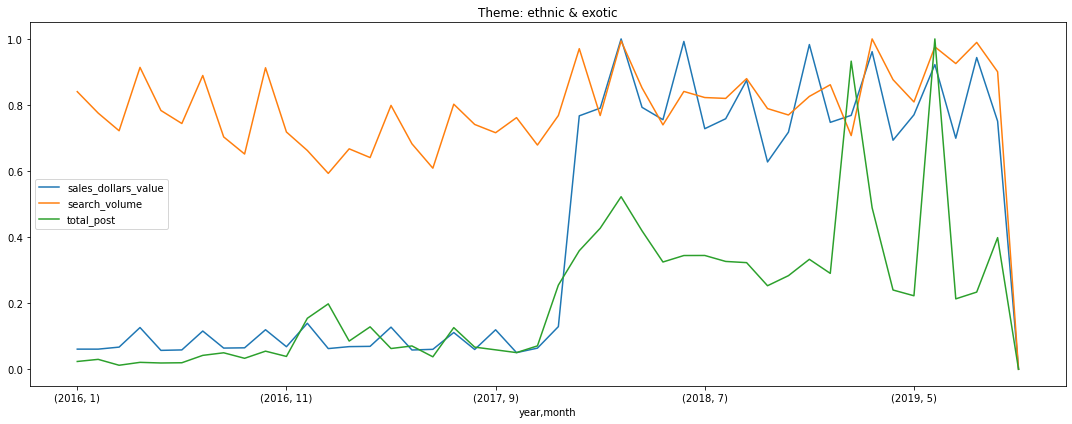

FixedFormatter should only be used together with FixedLocator


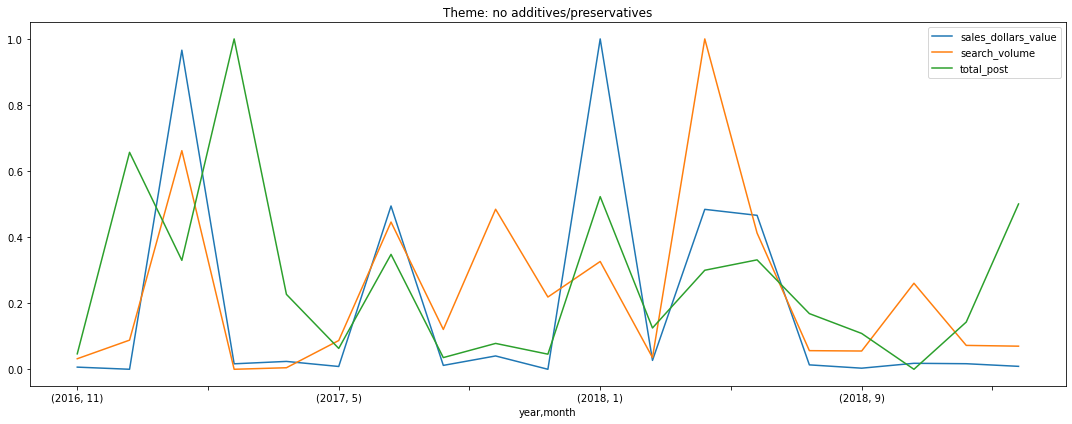

FixedFormatter should only be used together with FixedLocator


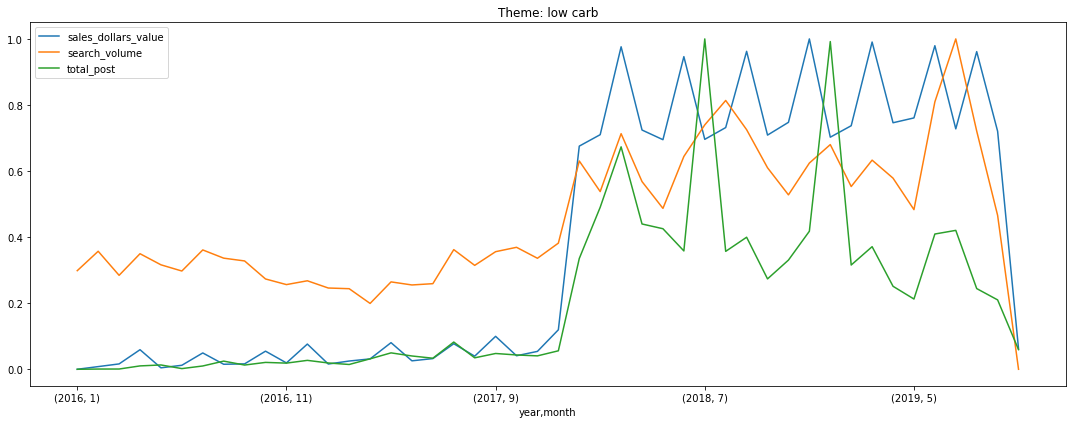

FixedFormatter should only be used together with FixedLocator


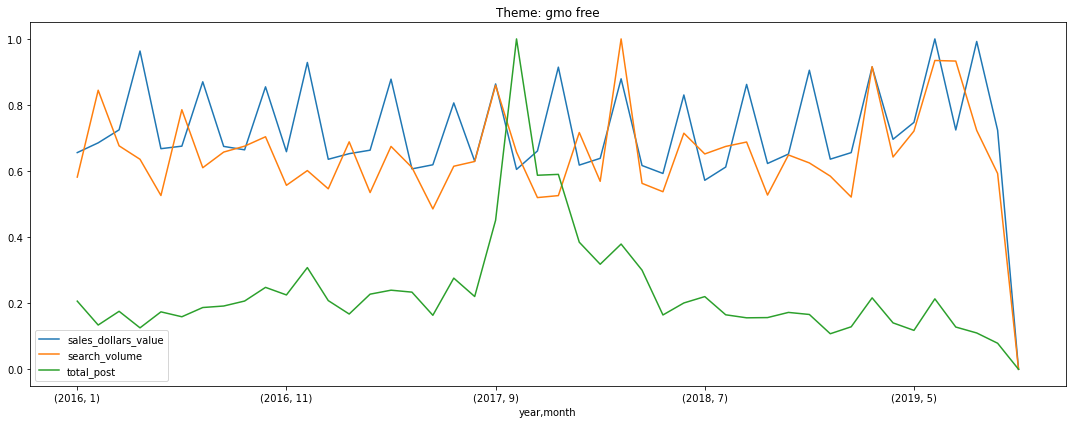

FixedFormatter should only be used together with FixedLocator


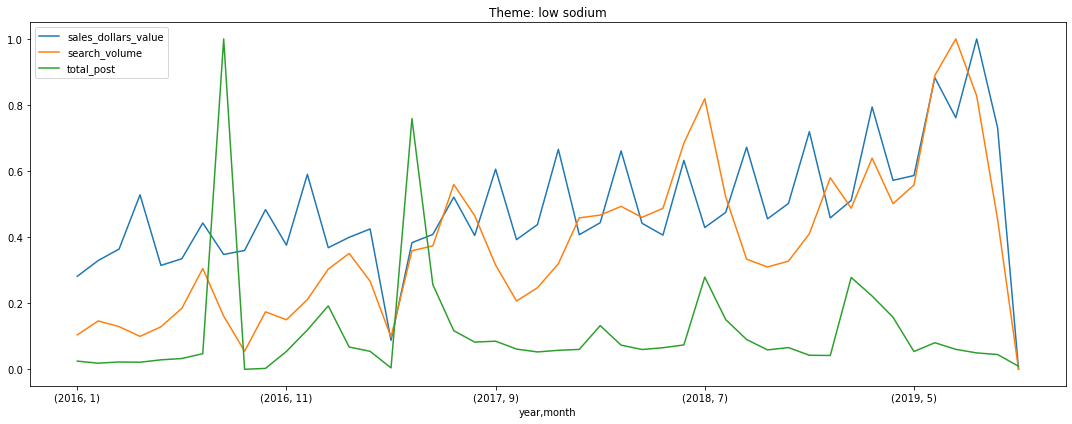

FixedFormatter should only be used together with FixedLocator


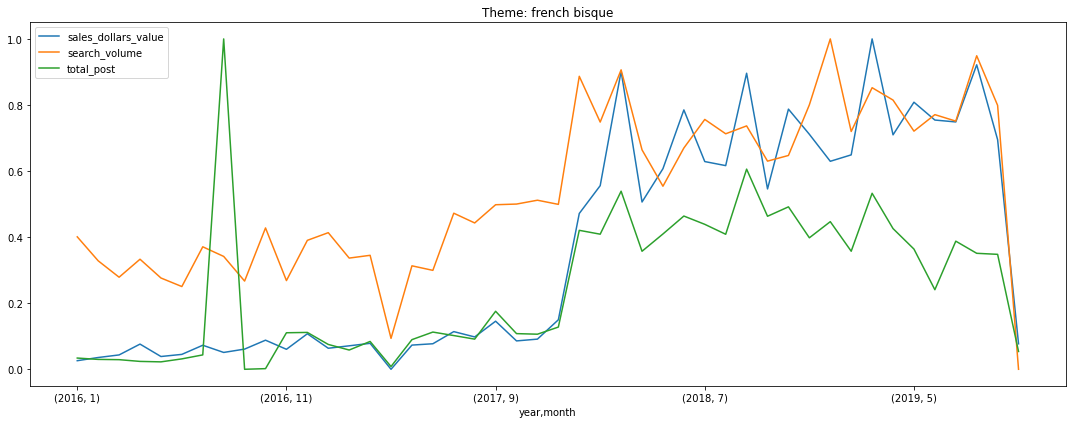

FixedFormatter should only be used together with FixedLocator


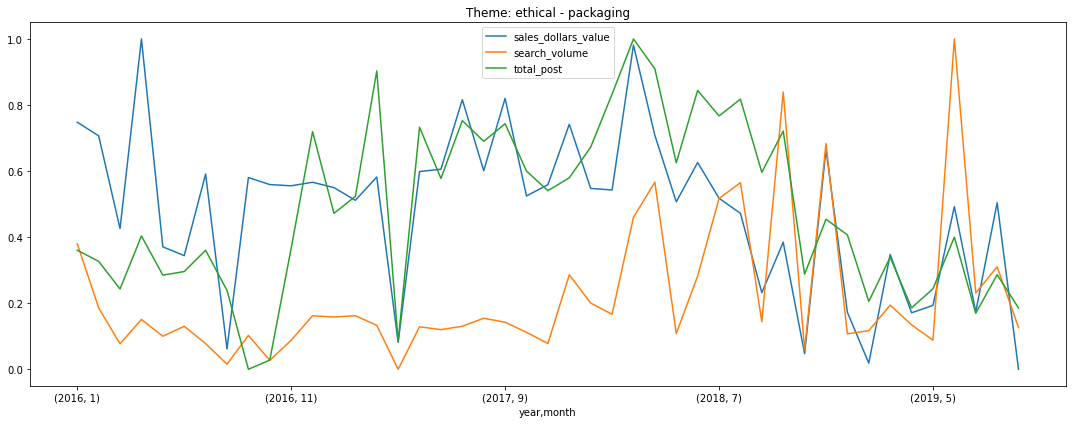

FixedFormatter should only be used together with FixedLocator


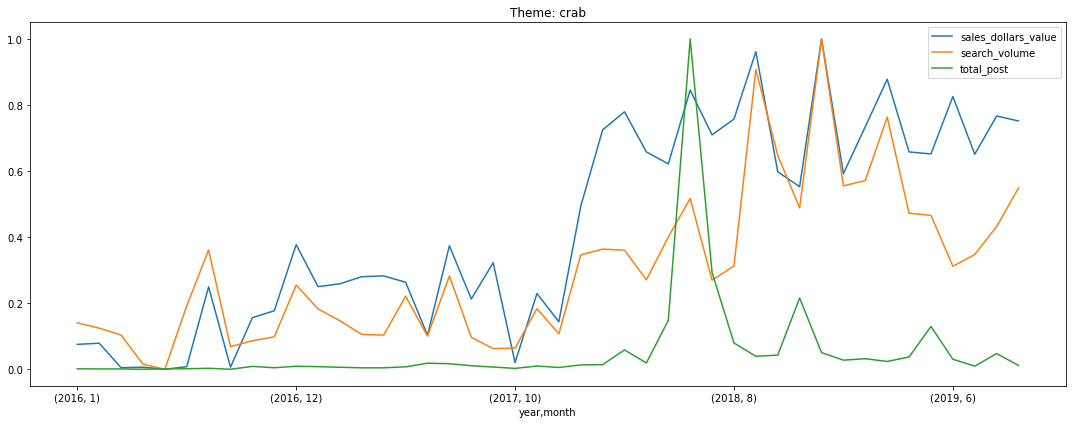

FixedFormatter should only be used together with FixedLocator


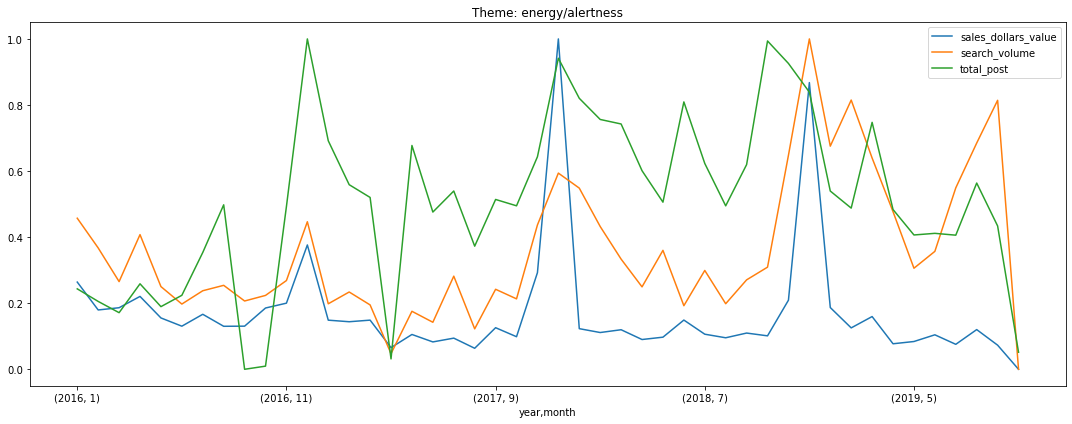

FixedFormatter should only be used together with FixedLocator


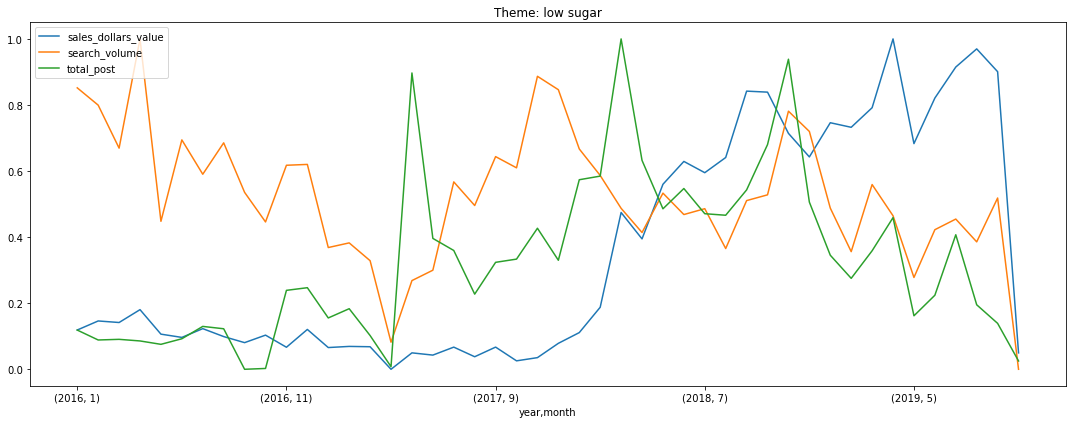

FixedFormatter should only be used together with FixedLocator


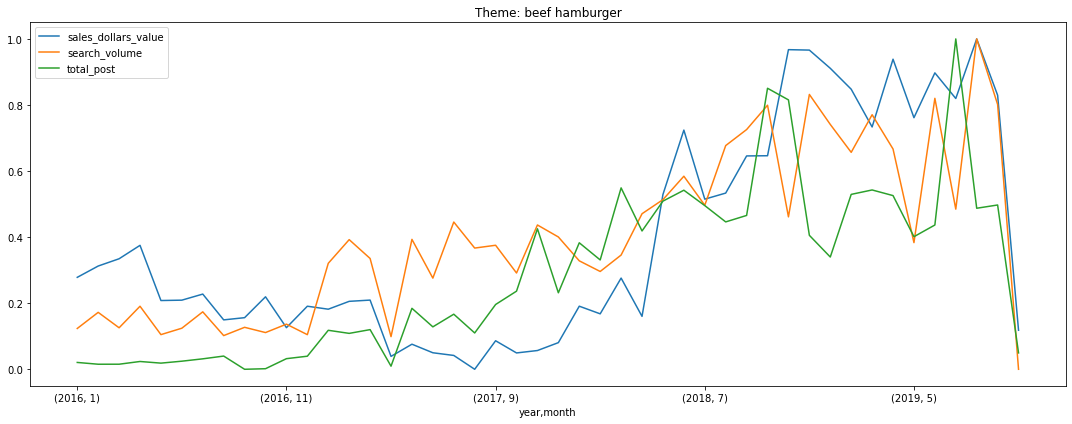

FixedFormatter should only be used together with FixedLocator


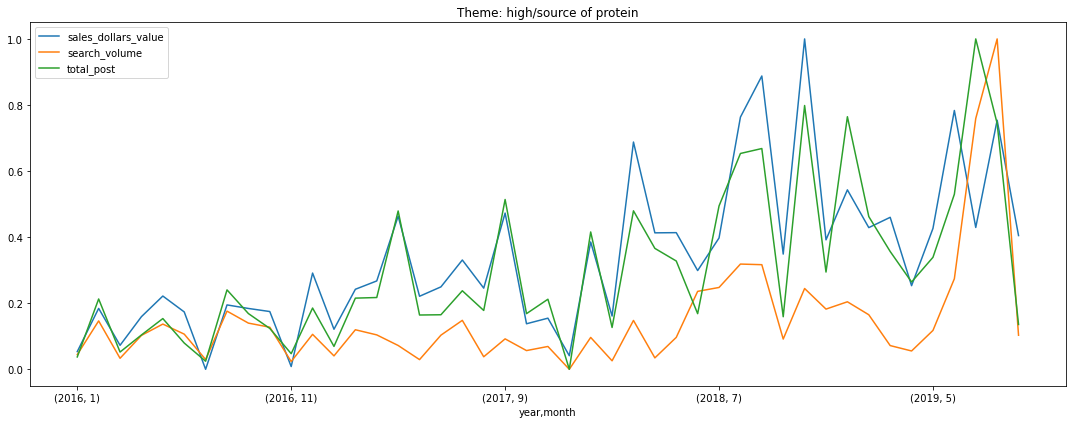

FixedFormatter should only be used together with FixedLocator


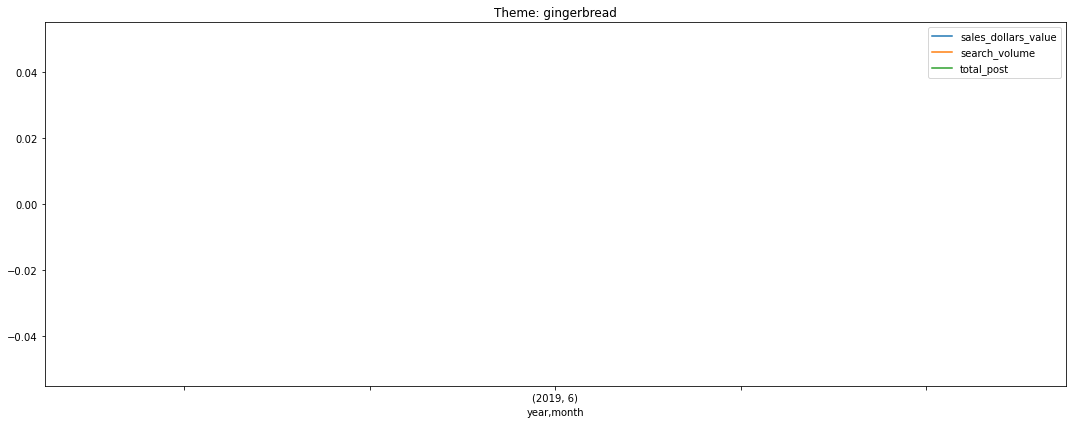

FixedFormatter should only be used together with FixedLocator


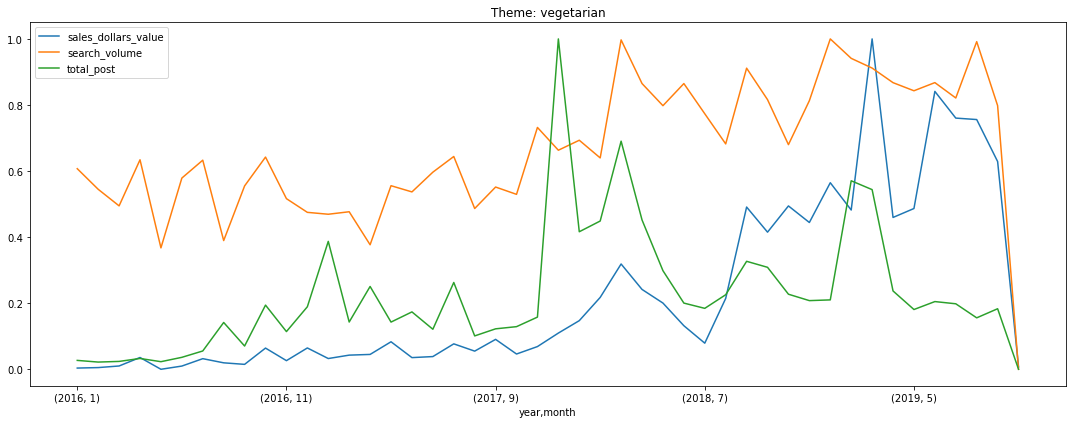

FixedFormatter should only be used together with FixedLocator


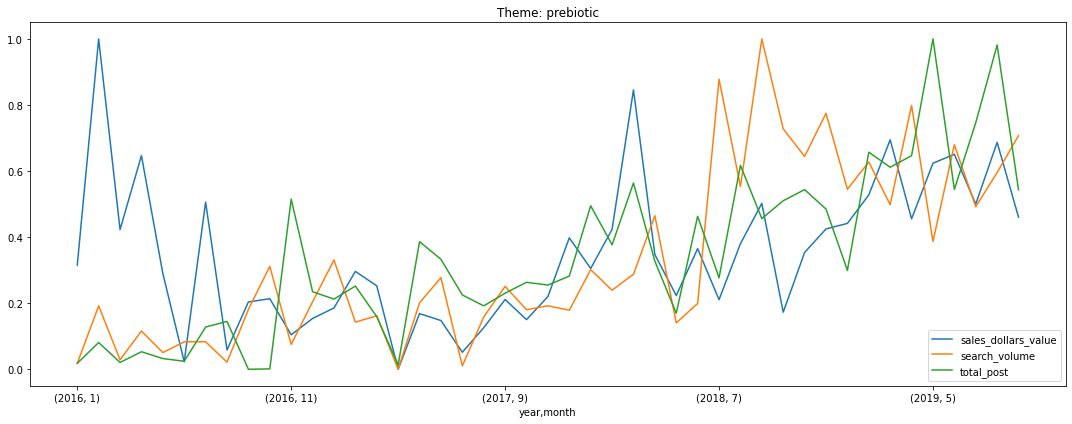

FixedFormatter should only be used together with FixedLocator


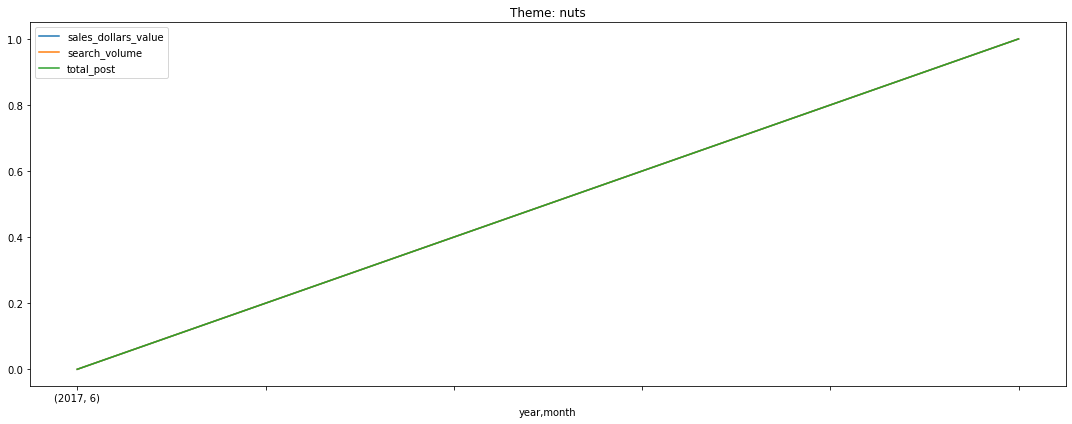

FixedFormatter should only be used together with FixedLocator


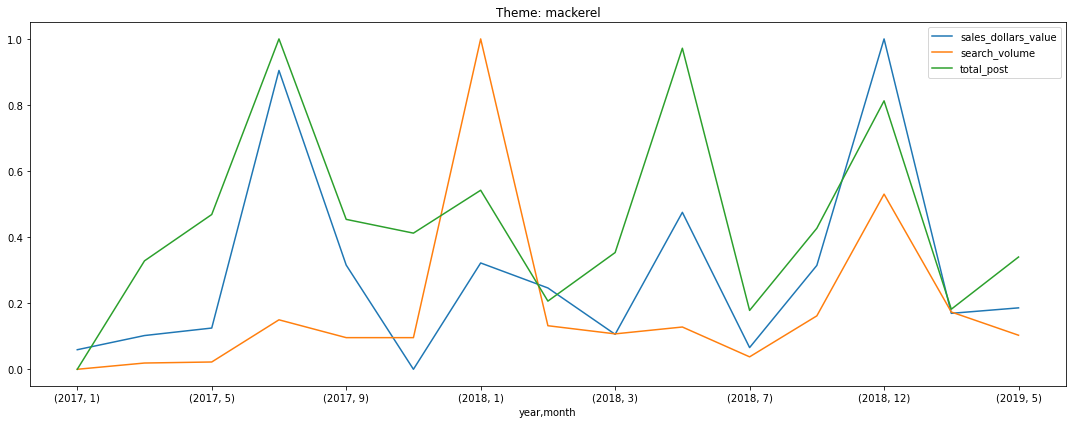

FixedFormatter should only be used together with FixedLocator


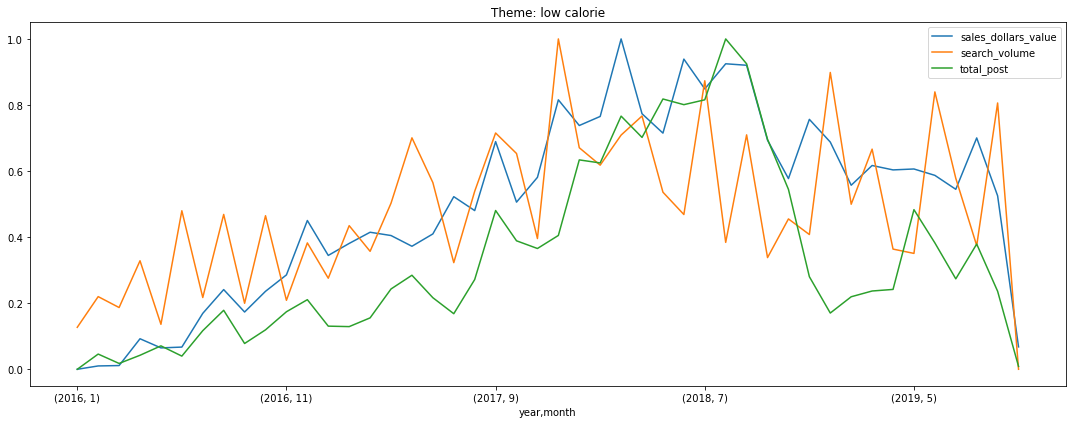

FixedFormatter should only be used together with FixedLocator


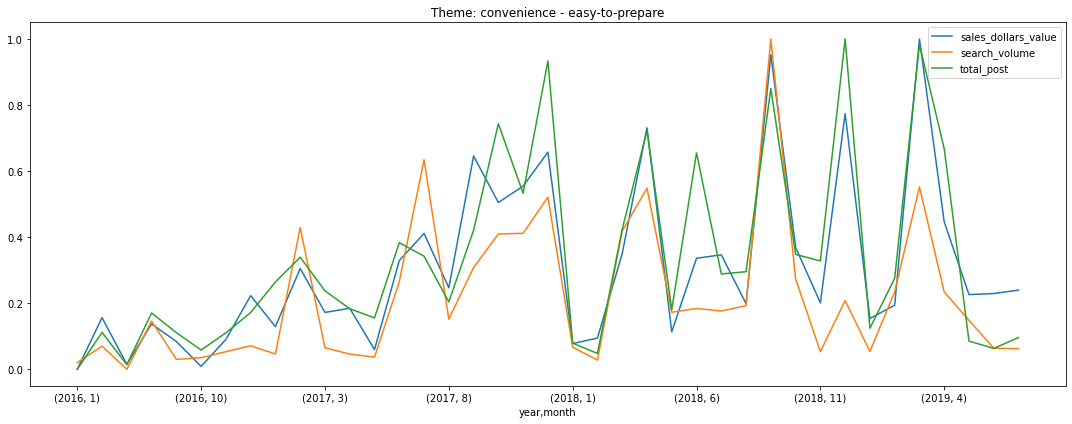

FixedFormatter should only be used together with FixedLocator


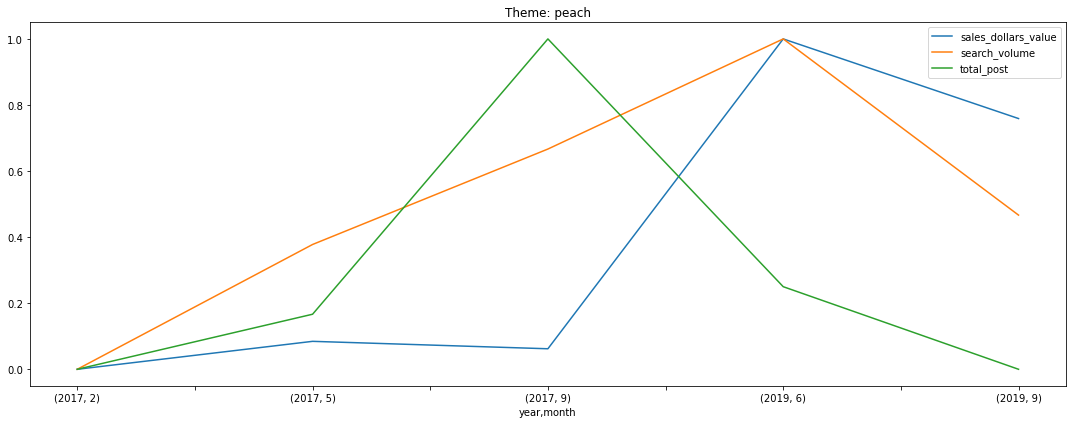

FixedFormatter should only be used together with FixedLocator


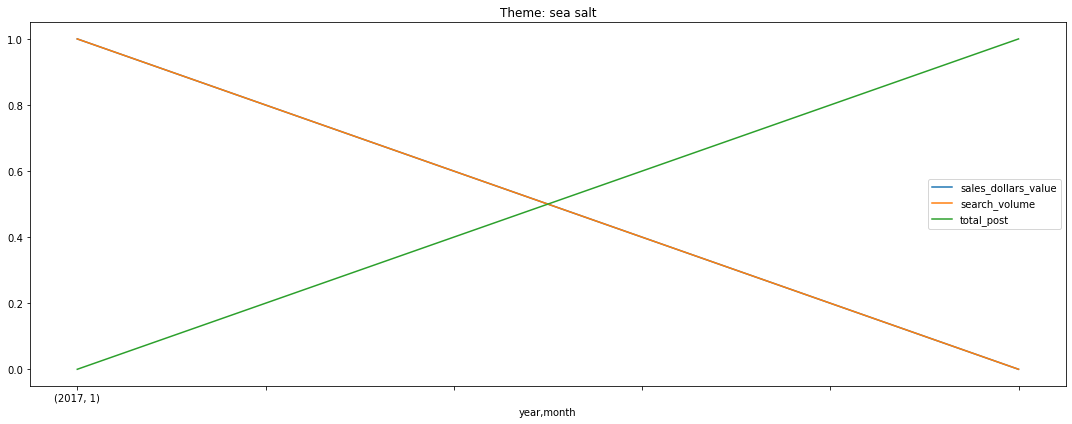

FixedFormatter should only be used together with FixedLocator


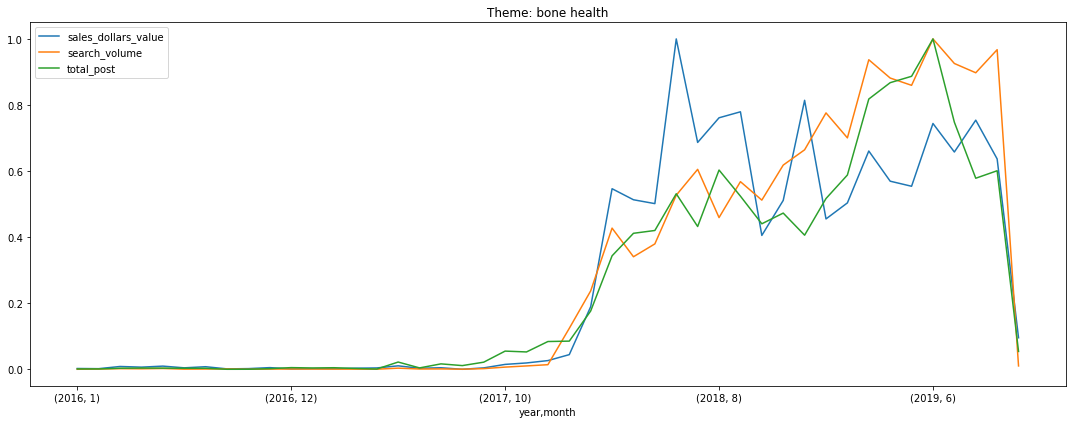

FixedFormatter should only be used together with FixedLocator


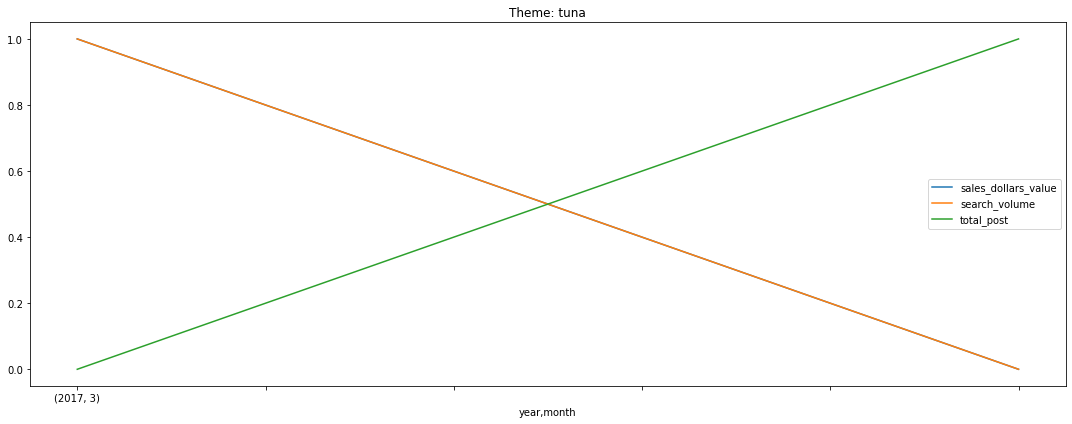

FixedFormatter should only be used together with FixedLocator


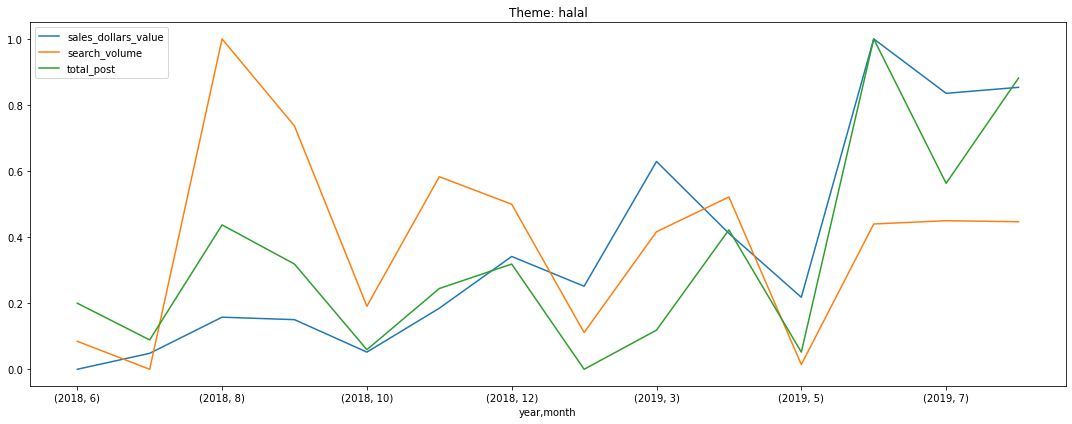

FixedFormatter should only be used together with FixedLocator


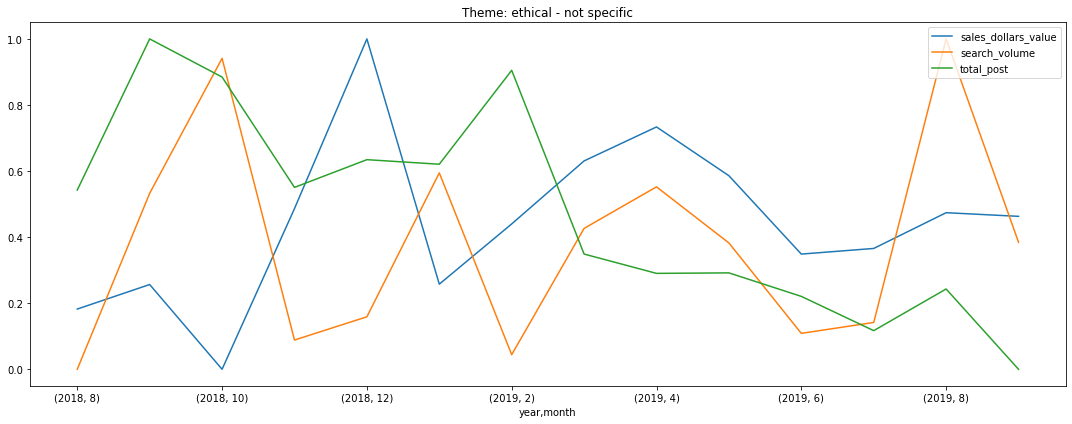

In [48]:
for i in final_df.claim_name.unique():
    latency_theme = final_df[final_df['claim_name'] == i]
    df = latency_theme.groupby(['year','month'])[['sales_dollars_value','search_volume','total_post']].sum()
    for j in df.columns:
        column = j
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    df.plot.line(figsize=(15,6))
    plt.title('Theme: {}'.format(i))
    plt.show()
    

In [49]:
# ginger bread, tuna, mackerel, peach

In [50]:
d = final_df[final_df['claim_name'] == 'gingerbread']
d.product_id.nunique()

103

            sales_dollars_value  search_volume  total_post
year month                                                
2017 3                     98.0           2468          56
     5                      1.0           1218          72


FixedFormatter should only be used together with FixedLocator


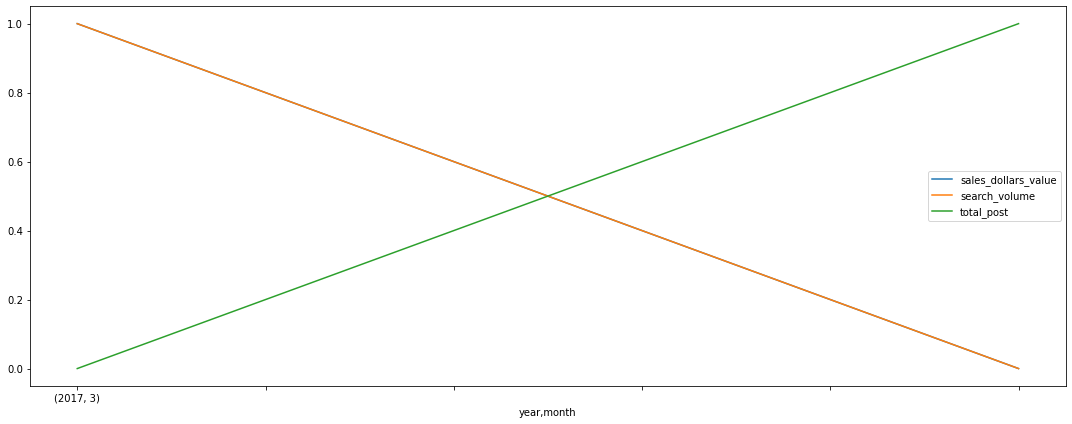

In [51]:
latency_theme = final_df[final_df['claim_name'] == 'tuna']
df = latency_theme.groupby(['year','month'])[['sales_dollars_value','search_volume','total_post']].sum()
print(df)
for j in df.columns:
    column = j
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
df.plot.line(figsize=(15,6))
# plt.title('Theme: {}'.format(i))
plt.show()

## 2.3 Business intuition features

This section can go into production code if these features are used in final model

#### First Time Customer.
- A binary feature that tells if the customer is in business for the first time or not.

In [52]:
# # first time customer
# cust_details = sales_df.groupby(['customername']).agg({'ledger_date':'min'}).reset_index()
# cust_details.columns = ['customername','ledger_date']
# cust_details['first_time_customer'] = 1
# sales_df = sales_df.merge(cust_details, on=['customername','ledger_date'], how='left')
# sales_df['first_time_customer'].fillna(0, inplace=True)

#### Days Since Last Purchase of a customer
- Feature representing the number of days from the last purchase of a customer. 
- Quantifies the Gaps customers take b/w purchases

In [53]:
# #### days since last purchase
# sales_df.sort_values('ledger_date',inplace=True)
# sales_df['days_since_last_purchase'] = (
#     sales_df
#        .groupby('customername')['ledger_date']
#        .diff()
#        .dt.days
#        .fillna(0, downcast='infer'))

In [54]:
final_df.drop(columns=['claim_id'],inplace= True)

In [55]:
# create a sample dataframe with minimal processing

# sales_df_processed = (
#     sales_df
    
#     # tweak to test pipeline quickly or profile performance
#     #.sample(frac=1, replace=False)
    
#     # any additional processing/cleaning
# )

# Any verifications on the data
from ta_lib.eda.api import get_variable_summary
display_as_tabs([
    ("Summary", f"Length: {len(final_df)}, Columns: {len(final_df.columns)}"),
    ("Variable summary", get_variable_summary(final_df)),
    ("head", final_df.head(5).T),
    ("tail", final_df.tail(5).T),
])

Tabs
    [0] Markdown(str, name='Summary')
    [1] DataFrame(name='Variable summary', value=                          ...)
    [2] DataFrame(name='head', value=              ...)
    [3] DataFrame(name='tail', value=              ...)

In [56]:
final_df.isna().sum()

product_id             0
sales_dollars_value    0
sales_units_value      0
sales_lbs_value        0
week                   0
month                  0
quarter                0
year                   0
vendor                 0
claim_name             0
platform               0
search_volume          0
total_post             0
dtype: int64

In [57]:
save_dataset(context, final_df, 'processed/sales')

# 3. Generate Train, Validation and Test datasets



- We split the data into train, test (optionally, also a validation dataset)
- In this example, we are binning the target into 10 quantiles and then use a Stratified Shuffle to split the data.
- See sklearn documentation on the various available splitters
- https://scikit-learn.org/stable/modules/classes.html#splitter-classes
- This will go into production code (training only)

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit
from ta_lib.core.api import custom_train_test_split  # helper function to customize splitting
from scripts import *

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=context.random_seed)
sales_df_train, sales_df_test = custom_train_test_split(final_df, splitter, by=binned_selling_price)

In [59]:
target_col = "sales_dollars_value"

train_X, train_y = (
    sales_df_train
    
    # split the dataset to train and test
    .get_features_targets(target_column_names=target_col)
)
save_dataset(context, train_X, 'train/sales/features')
save_dataset(context, train_y, 'train/sales/target')


test_X, test_y = (
    sales_df_test
    
    # split the dataset to train and test
    .get_features_targets(target_column_names=target_col)
)
save_dataset(context, test_X, 'test/sales/features')
save_dataset(context, test_y, 'test/sales/target')

In [72]:
sum1 = eda.get_outliers(final_df)
display_as_tabs([('FInal',sum1)])

Tabs
    [0] DataFrame(name='FInal', value=                     ('Dat...)